In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop("Id",axis=1)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
#Converting class labels into numerical form

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

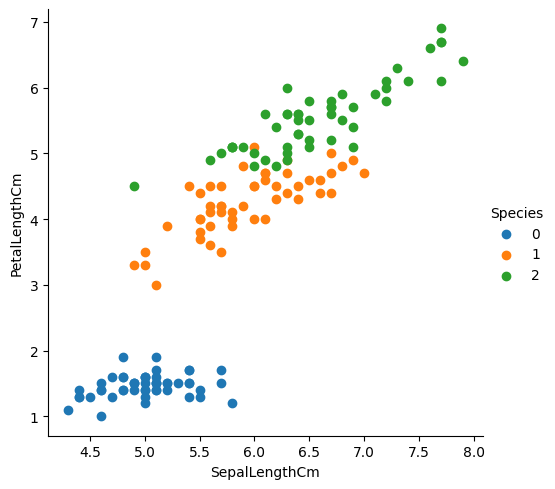

In [11]:
# Plotting the three verities of iris flowers
sns.FacetGrid(df,hue='Species',height=5).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

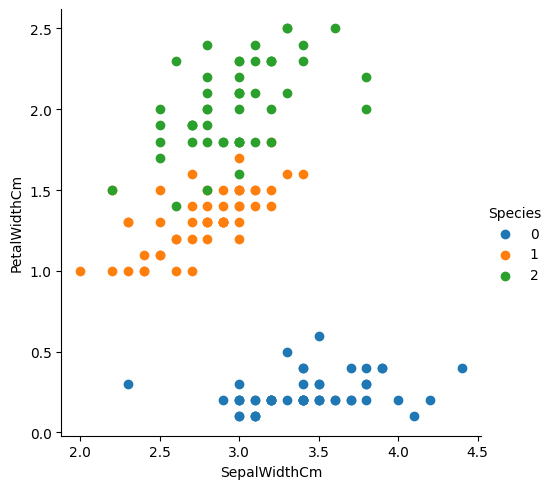

In [12]:
sns.FacetGrid(df,hue='Species',height=5).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()

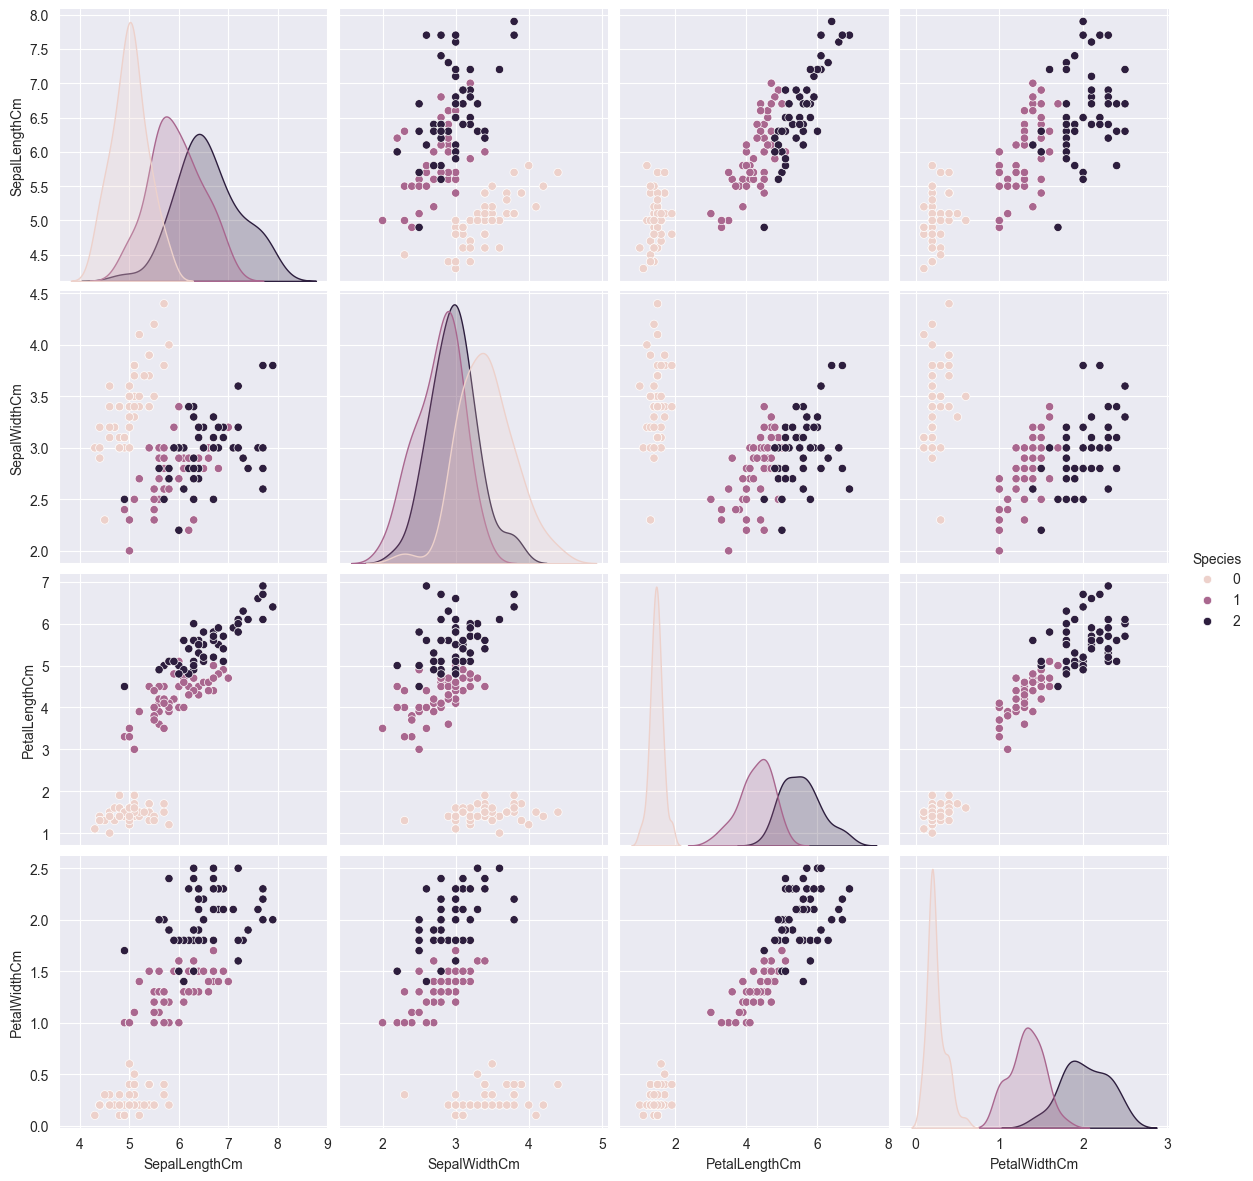

In [14]:
# Pairwise scatter plot: pair plot
#Dis-advantage are 1.can be used when number of features are high.
                #  2.cannot visualize higher dimensional patterns in 3D and 4
import warnings
warnings.filterwarnings("ignore")
plt.close() # closes any previously open plots that might be displayed
sns.set_style("darkgrid")
sns.pairplot(df,hue="Species",size=3)
plt.show()

<Axes: >

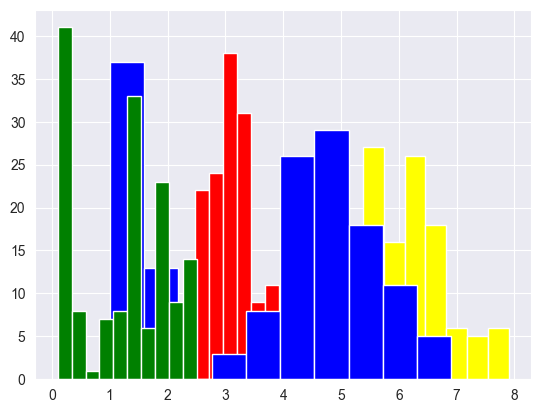

In [15]:
#Plotting histogram for all the features together
df['SepalLengthCm'].hist(color='yellow')
df['SepalWidthCm'].hist(color='red')
df['PetalLengthCm'].hist(color='blue')
df['PetalWidthCm'].hist(color='green')

In [16]:
# Plot scatter plot to visualize relationships between features
species=[0,1,2]
color=['red','orange','blue']

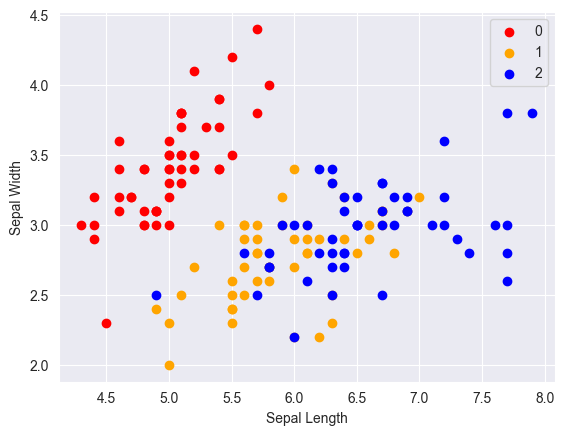

In [17]:
# scatter plot showing relation between Sepal Length and Sepal Width

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

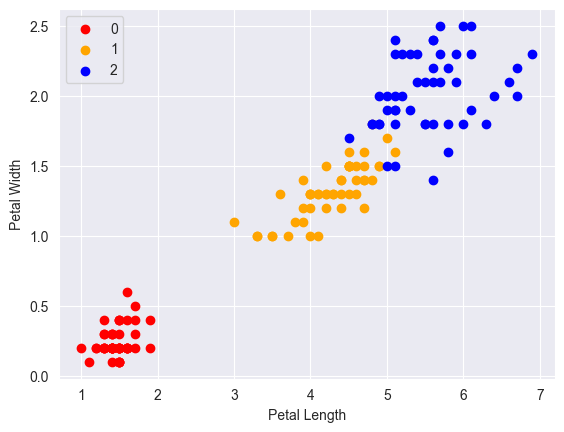

In [18]:
# Scatter plot for Petal Length vs Petal Width 
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

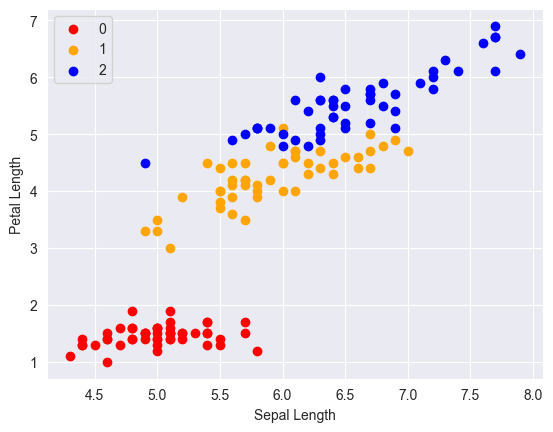

In [19]:
# Scatter plot for Petal Length vs Sepal Length
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

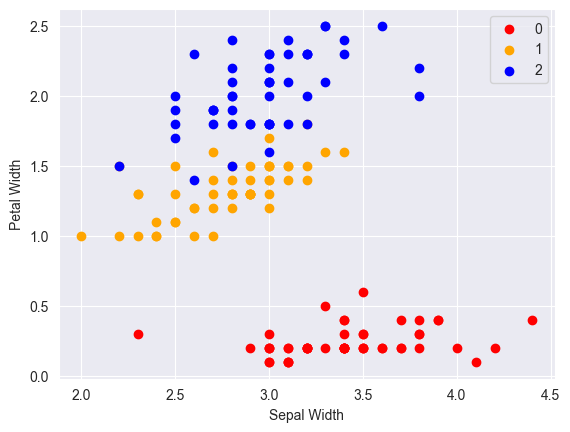

In [20]:
# Scatter plot for Sepal Width vs Petal Width
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = color[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [21]:
# Finding the correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

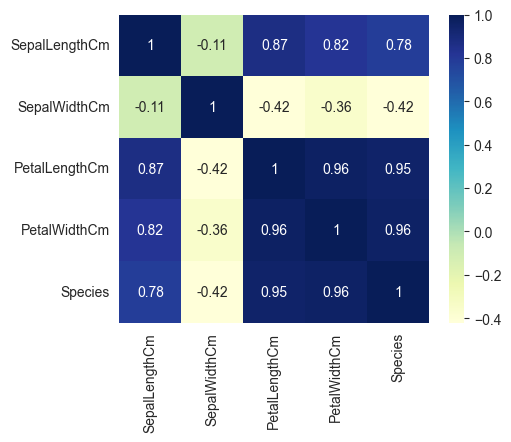

In [22]:
# displaying the correlation matrix using a heatmap
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='YlGnBu') #cmap can be Greens,coolwarm,YlGnBu,RdBu

SPLITTING THE DATASET INTO TRAINING AND TESTING DATA

In [23]:
#splitting the data into features X and target Y
X = df.drop('Species',axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y = df["Species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [25]:
# Doing train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3,random_state=1)

LOGISTIC REGRESSION

In [26]:
model1=LogisticRegression()
model1.fit(X_train,y_train)
lr=round(model1.score(X_test,y_test)*100,2)
lr

97.78

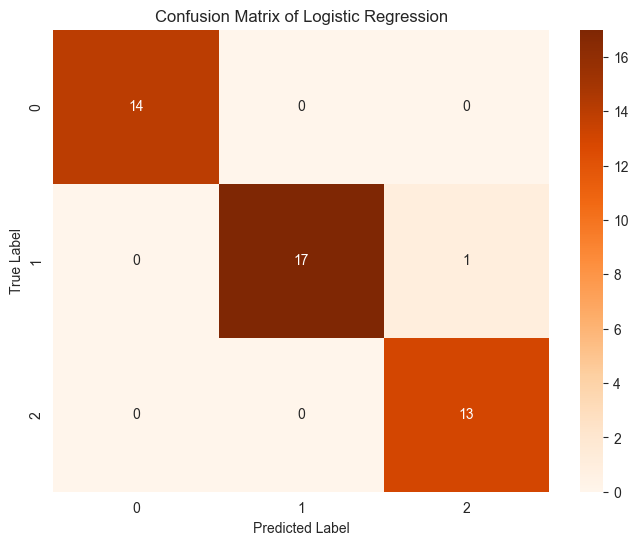

In [27]:
y_pred1=model1.predict(X_test)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [28]:
# K-nearest model (KNN)
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)
knn=round(model2.score(X_test,y_test)*100,2)
knn

97.78

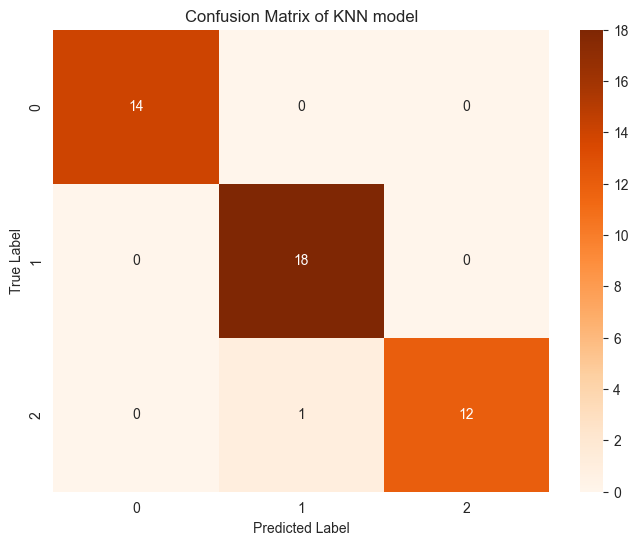

In [29]:
y_pred2=model2.predict(X_test)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN model')
plt.show()

DECISIONTREE MODEL

In [30]:
#Decision Tree model
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
dt=round(model3.score(X_test,y_test)*100,2)
dt

95.56

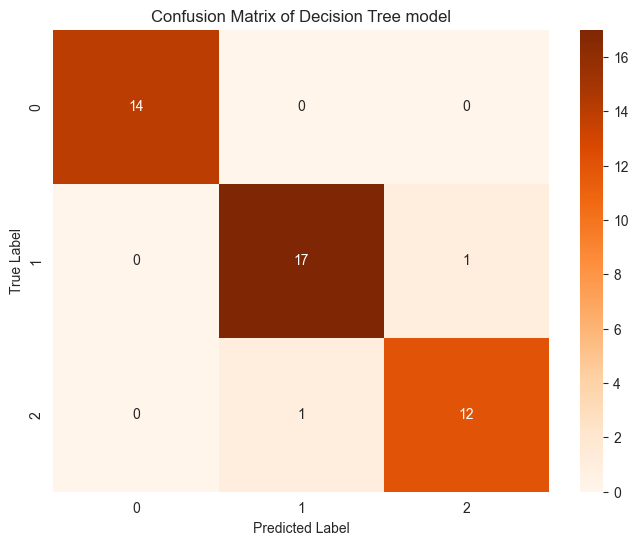

In [31]:
y_pred3=model3.predict(X_test)
conf_matrix3 = confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree model')
plt.show()

NAIVE BAYES MODEL

In [33]:
# Naive Bayes Model
model4 = GaussianNB()
model4 .fit(X_train, y_train)
y_pred4 = model4 .predict(X_test)
nb=round(model4.score(X_test,y_test)*100)
nb

93

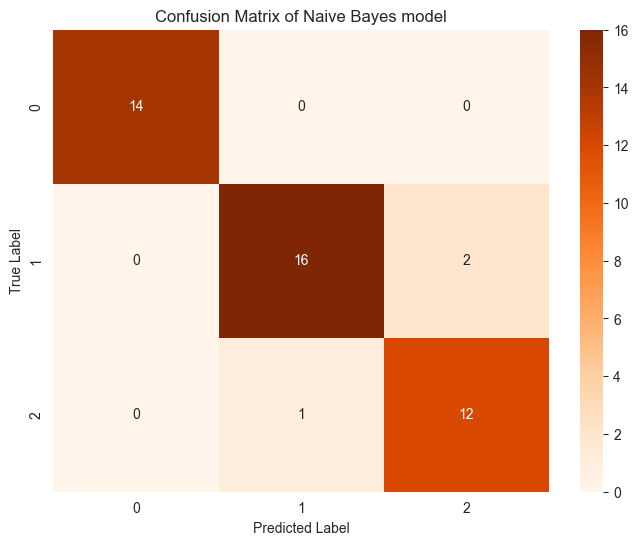

In [34]:
conf_matrix4 = confusion_matrix(y_test,y_pred4)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Naive Bayes model')
plt.show()

ADABOOST CLASSIFIER MODEL

In [35]:
model5=AdaBoostClassifier(n_estimators=50)
model5 .fit(X_train, y_train)
y_pred5 = model5 .predict(X_test)
ad=round(model5.score(X_test,y_test)*100)
ad

96

In [36]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','Decision Tree Classifier','Naive Bayes','Adaboost classifier'],
    'Score': [lr,knn,dt,nb,ad]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,97.78
1,knn,97.78
4,Adaboost classifier,96.00
2,Decision Tree Classifier,95.56
3,Naive Bayes,93.00


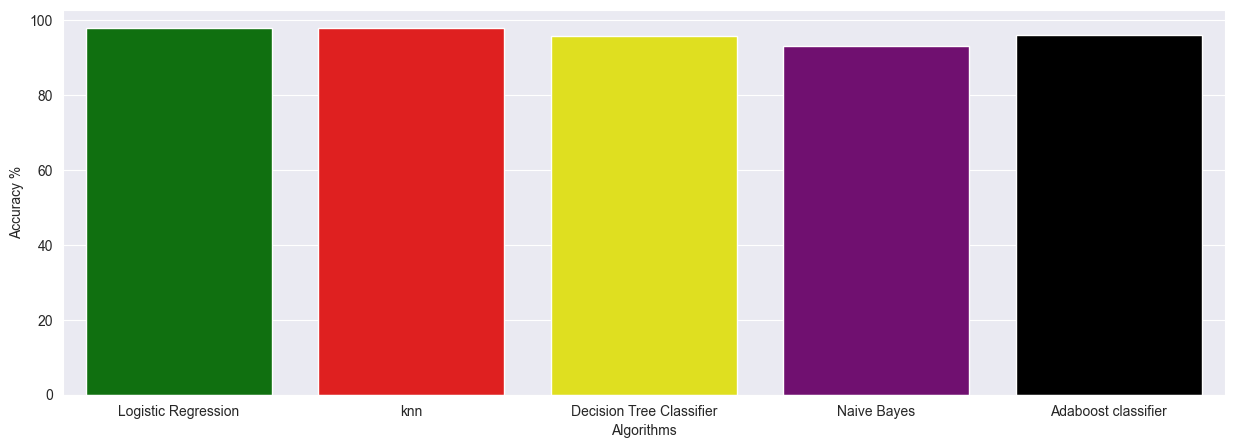

In [38]:
colors = [ "green", "red", "yellow","purple","black"]

sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

On analyzing the classification models we can conclude that logistic model and K nearest neighbour model has significant percent of accuracy